In [1]:
import numpy as np
import matplotlib.pyplot as plt

In [2]:
import tensorflow

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

In [4]:
# Загрузка датасета MNIST
(x_train, y_train), (x_test, y_test) = keras.datasets.mnist.load_data()

In [5]:
print('TRAIN:', x_train.shape, y_train.shape)
print('TEST', x_test.shape, y_test.shape)

TRAIN: (60000, 28, 28) (60000,)
TEST (10000, 28, 28) (10000,)


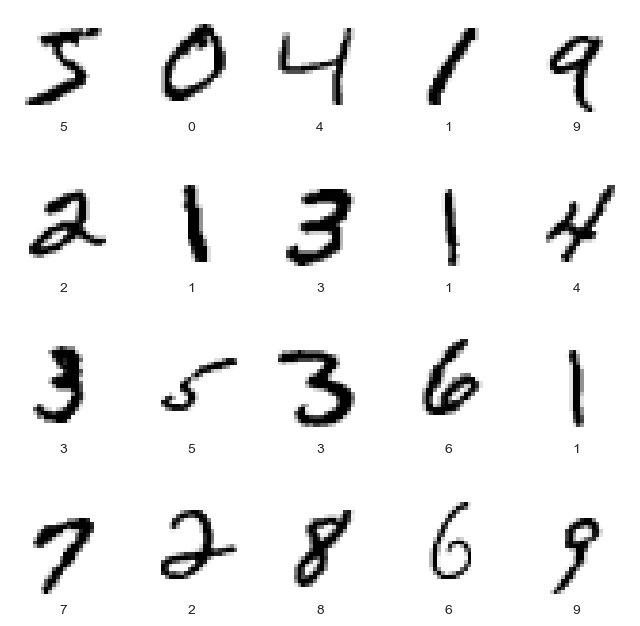

In [6]:
# Вывод первых 30 изображений
plt.figure(figsize=(8, 8))
for i in range(20):
    plt.subplot(4, 5, i + 1)
    plt.xticks([])
    plt.yticks([])
    plt.grid(False)
    plt.imshow(x_train[i], cmap=plt.cm.binary)
    plt.xlabel(y_train[i])
plt.show()

In [7]:
# Преобразование данных в диапазон от 0 до 1
x_train = x_train.astype("float32") / 255
x_test = x_test.astype("float32") / 255
# Преобразуем значения пикселей входных изображений в диапазон от 0 до 1, что поможет обучению модели быстрее сходиться.

In [8]:
# Определение модели нейронной сети
model = keras.Sequential(
    [
        keras.Input(shape=(28, 28)), # входной слой с размером входных изображений 28x28
        layers.Flatten(), # выравнивание входных изображений в одномерный массив
        layers.Dense(522, activation="relu"), # полносвязный скрытый слой с 522 нейронами и функцией активации ReLU
        # layers.Dense(254, activation="relu"), # полносвязный скрытый слой
        # layers.Dense(64, activation="relu"), # полносвязный скрытый слой
        layers.Dense(10, activation="softmax"), # полносвязный выходной слой с 10 нейронами (по количеству классов) и функцией активации Softmax
    ]
)

In [9]:
# Компиляция модели
model.compile(optimizer="adam", loss="sparse_categorical_crossentropy", metrics=["accuracy"])
# компилируем модель с оптимизатором Adam, функцией потерь SparseCategoricalCrossentropy и метрикой точности.

In [10]:
%%time
# Обучение модели
model.fit(x_train, y_train, batch_size=32, epochs=5, validation_split=0.1)

Epoch 1/5
1688/1688 [==============================] - 8s 4ms/step - loss: 0.2101 - accuracy: 0.9371 - val_loss: 0.0988 - val_accuracy: 0.9687
Epoch 2/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0861 - accuracy: 0.9737 - val_loss: 0.0811 - val_accuracy: 0.9767
Epoch 3/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0553 - accuracy: 0.9828 - val_loss: 0.0714 - val_accuracy: 0.9795
Epoch 4/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0386 - accuracy: 0.9875 - val_loss: 0.0730 - val_accuracy: 0.9800
Epoch 5/5
1688/1688 [==============================] - 7s 4ms/step - loss: 0.0287 - accuracy: 0.9909 - val_loss: 0.0766 - val_accuracy: 0.9803
CPU times: total: 3min 15s
Wall time: 37.5 s


In [11]:
# Оценка точности на тестовых данных
test_loss, test_acc = model.evaluate(x_test, y_test)
print(f"Test accuracy: {test_acc}")

313/313 [==============================] - 0s 914us/step - loss: 0.0668 - accuracy: 0.9811
Test accuracy: 0.9811000227928162


# Посмотрим на те цифры, что были неверно интерпретированы

In [12]:
# Получение прогнозов модели на тестовых данных
y_pred = model.predict(x_test)
y_pred = np.argmax(y_pred, axis=1)

313/313 [==============================] - 0s 814us/step


In [13]:
# Нахождение индексов неверно определенных изображений
wrong_indices = np.where(y_pred != y_test)[0]

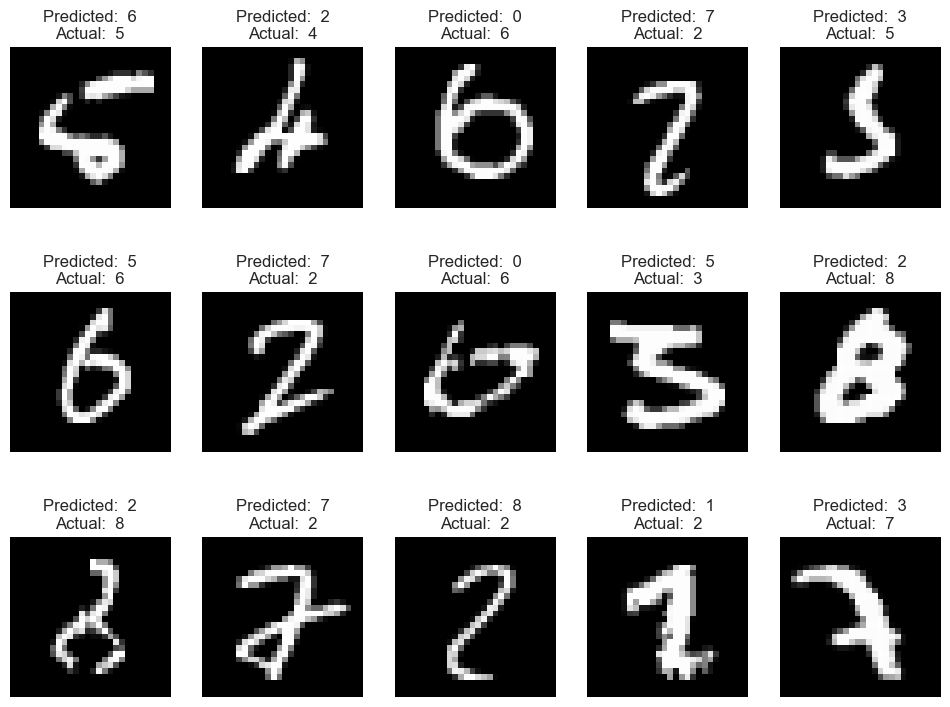

In [14]:
# Вывод 10 неверно определенных изображений
fig, axes = plt.subplots(nrows=3, ncols=5, figsize=(12, 9))
for i, ax in enumerate(axes.flat):
    if i < 15:
        idx = wrong_indices[i]
        ax.imshow(x_test[idx], cmap="gray")
        ax.set_title(f"Predicted:  {y_pred[idx]}\nActual:  {y_test[idx]}")
        ax.axis("off")
    else:
        break
plt.show()

# <center> Небольшая теоретическая справка для используемых функций </center>

# функция активации ReLU (Rectified Linear Unit)

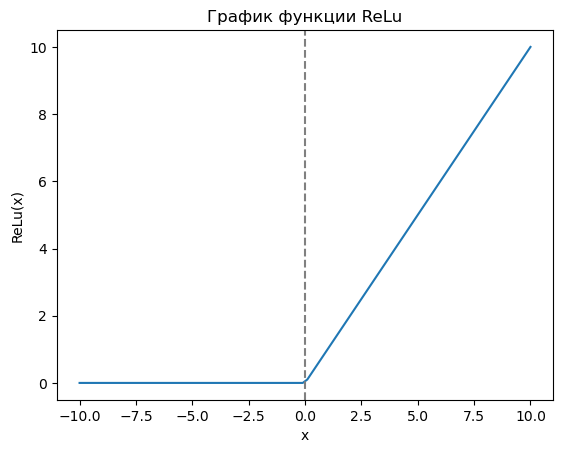

In [65]:
def show_relu():
    def relu(x):
        return np.maximum(0,x)

    x = np.linspace(-10,10,100)
    y = relu(x)

    plt.plot(x,y)
    plt.xlabel('x')
    plt.ylabel('ReLu(x)')
    plt.title('График функции ReLu')
    # Добавляем вертикальную ось в точке x = 0
    plt.axvline(x=0, color='gray', linestyle='--')
    plt.show()

show_relu()

ReLU (Rectified Linear Unit) - это функция активации, которая часто используется в нейронных сетях.
Она определяется как:

f(x) = max(0, x); где x - входной сигнал (значение), а f(x) - выходной сигнал (значение).

Математически, ReLU просто отбрасывает все отрицательные значения входа и оставляет все положительные значения неизменными.
Таким образом, функция активации ReLU имеет следующую формулу:
$$f(x) = \begin{cases} x, & \text{ if } x > 0 \\ 0, & \text{ if } x \leq 0 \end{cases}$$
Функция активации ReLU возвращает 0 для отрицательных значений входного сигнала и сам входной сигнал для положительных значений.

Это приводит к некоторым интересным свойствам, которые делают функцию активации ReLU полезной в нейронных сетях:

Простота вычислений: функция ReLU очень проста в вычислении, так как ее можно реализовать как простой пороговый оператор.
Это делает ее очень быстрой и эффективной для использования в больших нейронных сетях.

Проблема затухания градиента: функция ReLU помогает избежать проблемы затухания градиента,
которая может возникнуть при использовании других функций активации, которые могут приводить к нулю или отрицательным значениям входа,
таких как сигмоида или гиперболический тангенс.
Затухание градиента происходит, когда градиент становится очень маленьким, и это может затруднить обучение нейронной сети.

Способность моделировать нелинейные зависимости:
функция ReLU является нелинейной, что позволяет нейронной сети моделировать более сложные и нелинейные зависимости в данных.

ReLU также обладает свойством разреженности, что означает, что она может сделать большое количество нейронов неактивными.
Это может быть полезно для уменьшения переобучения в нейронных сетях.

Хотя функция активации ReLU имеет множество преимуществ, она не является универсальным решением для всех проблем в нейронных сетях.
Например, функция ReLU может "умереть" на определенных входных значениях, что может привести к нулевому градиенту и остановке обучения.
Для решения этой проблемы существуют другие функции активации, такие как Leaky ReLU и ELU.

# Оптимизатор Adam (Adaptive Moment Estimation)

Оптимизатор Adam (Adaptive Moment Estimation) - это метод стохастической оптимизации, который сочетает в себе идеи двух других методов - градиентного спуска и адаптивного градиентного метода (AdaGrad).

Оптимизатор Adam поддерживает экспоненциально убывающие средние значения градиентов и квадратов градиентов. Это позволяет методу адаптироваться к разным скоростям обучения для различных параметров.

В оптимизаторе Adam используется два гиперпараметра: $\beta_1$ и $\beta_2$, которые определяют экспоненциальное затухание скользящих средних. Используются также параметры $\epsilon$, которые добавляются для стабилизации деления в формулах.

Формула обновления весов в оптимизаторе Adam выглядит следующим образом:
\begin{aligned}
m_t &= \beta_1 m_{t-1} + (1 - \beta_1) g_t \\
v_t &= \beta_2 v_{t-1} + (1 - \beta_2) g_t^2 \\
\hat{m}_t &= \frac{m_t}{1 - \beta_1^t} \\
\hat{v}_t &= \frac{v_t}{1 - \beta_2^t} \\
\theta_{t+1} &= \theta_t - \frac{\alpha}{\sqrt{\hat{v}_t} + \epsilon} \hat{m}_t
\end{aligned}

Здесь $g_t$ - градиент функции потерь в момент времени $t$, $m_t$ и $v_t$ - экспоненциально убывающие средние значения градиента и квадрата градиента соответственно, $\hat{m}_t$ и $\hat{v}_t$ - скорректированные значения средних, $\theta_t$ - вектор параметров модели в момент времени $t$, $\alpha$ - скорость обучения, $\epsilon$ - малое число для стабилизации деления.

Обновление весов осуществляется путем вычитания откорректированного значения среднего градиента $\hat{m}_t$ из текущих значений параметров $\theta_t$. Кроме того, значение скорректированного среднего квадрата градиента $\hat{v}_t$ используется для нормализации шага обучения.

В целом, оптимизатор Adam обеспечивает быстрое сходимость и эффективность обучения в задачах глубокого обучения, за счет адаптации скорости обучения для каждого параметра и сглаживания влияния

# Функция потерь Sparse Categorical Crossentropy

Функция потерь SparseCategoricalCrossentropy - это функция, которая используется для минимизации расхождения между реальными и предсказанными метками в многоклассовой классификации. Она является частным случаем функции CategoricalCrossentropy, которая используется для работы с метками, которые представлены в виде one-hot-encoding (т.е. вектором, содержащим только одну "единицу" и все остальные элементы равны "нулю").

В случае SparseCategoricalCrossentropy метки представляются в виде целых чисел, где каждое число соответствует индексу класса. Это означает, что в отличие от CategoricalCrossentropy, нет необходимости предварительно кодировать метки в one-hot-encoding формат.

Пусть $y$ - это истинные метки, а $\hat{y}$ - это предсказанные метки. Тогда функция потерь SparseCategoricalCrossentropy вычисляется следующим образом:

$ L(y,\hat{y}) = - \sum_{i} y_i \log(\hat{y_i}) $

где $i$ - это индекс класса, $y_i$ - это бинарный индикатор принадлежности класса $i$, а $\hat{y_i}$ - это вероятность принадлежности к классу $i$, предсказанная моделью.

Функция потерь SparseCategoricalCrossentropy является мерой несоответствия между истинными метками и предсказанными значениями, и ее цель - минимизировать эту меру путем корректировки весов модели в процессе обучения.

# Метрика точности (accuracy)

Метрика точности (accuracy) - это простая и понятная метрика для оценки производительности модели, которая показывает, как часто модель правильно предсказывает метки классов.

Для бинарной классификации, accuracy - это отношение числа правильно предсказанных примеров к общему числу примеров:
$$
accuracy = \frac{TP+TN}{TP+FP+TN+FN}
$$
где $TP$ - количество правильно предсказанных примеров, $TN$ - количество правильно предсказанных отрицательных примеров, $FP$ - количество неправильно предсказанных положительных примеров и $FN$ - количество неправильно предсказанных отрицательных примеров.

В многоклассовой классификации, accuracy определяется как среднее значение правильно предсказанных примеров по всем классам:
$$
accuracy = \frac{1}{N}\sum_{i=1}^{N}\frac{C_i}{T_i}
$$

где $N$ - количество классов, $C_i$ - количество правильно предсказанных примеров класса $i$ и $T_i$ - общее количество примеров класса $i$.

Таким образом, метрика точности показывает долю правильно предсказанных примеров, что является важным показателем для оценки производительности модели, особенно в случаях, когда классы сбалансированы. Однако, в случаях, когда классы не сбалансированы, метрика точности может быть недостаточно информативной, и в таких случаях необходимо использовать другие метрики, такие как precision и recall.